#### 결정 트리
##### 와인판매, 화이트, 레드 라벨 누락됨
##### 알콜 도수, 당도, PH값으로 라벨을 분류해라

In [1]:
### 로지스틱 회귀로 와인 분류하기
import pandas as pd
wine=pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()

## sugar는 평균값과 표준편차의 차이가 거의 없음, 최대값과의 차이가 매우 큼

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
# 독립, 종속
data=wine[['alcohol','sugar','pH']].to_numpy()
target=wine['class'].to_numpy()

In [5]:
data

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [6]:
target

array([0., 0., 0., ..., 1., 1., 1.])

In [7]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [8]:
# 데이터 형태 확인
print(train_input.shape,test_input.shape)

(5197, 3) (1300, 3)


In [9]:
# 표준화 실행
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_input)

train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [10]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(train_scaled,train_target)

print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.7808350971714451
0.7776923076923077


In [11]:
## 결정트리
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.996921300750433
0.8592307692307692


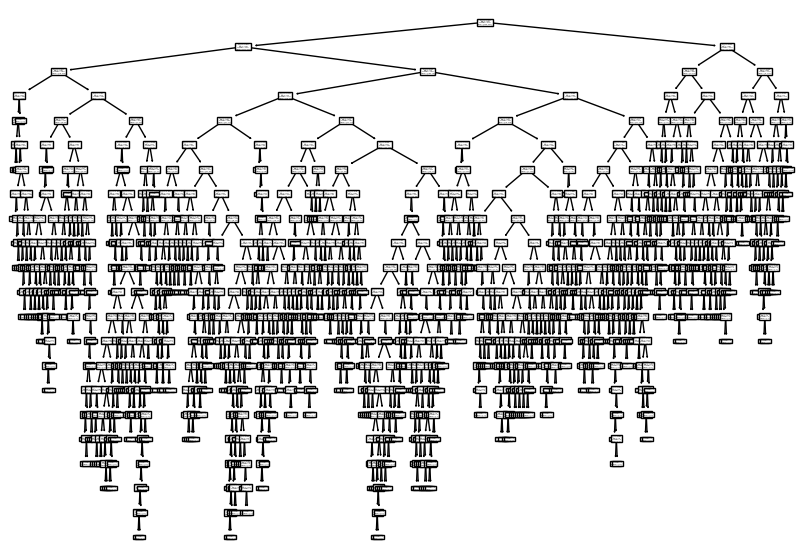

In [12]:
# 모델 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

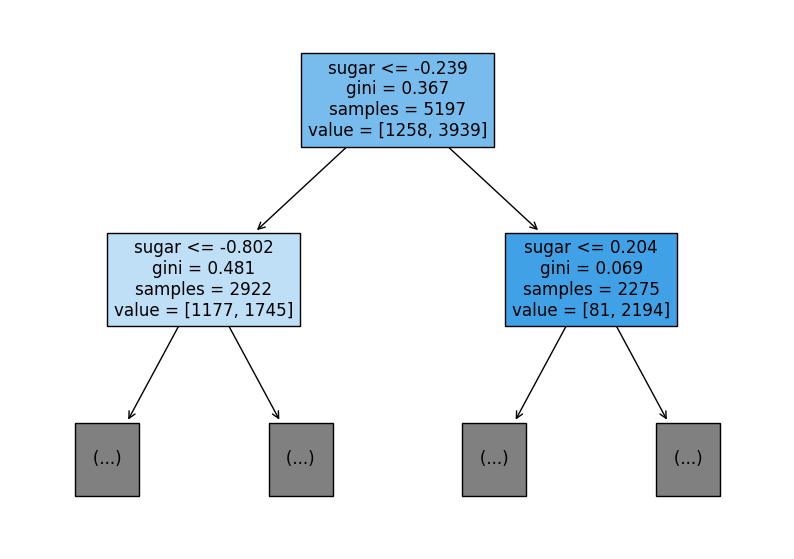

In [13]:
# 한개의 츨만 출력


plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()


# 지니 불순도 -> 0~0.5, 0.5에 가까울수록 불순도가 높다.

In [14]:
# 오버 피팅 -> 부모, 자식 노드의 불순도 차이가 더 이상 개선 되지 않을 때
# 부모 불순도 - (왼쪽 노드 샘플 수/부모의 샘플 수) * 왼쪽 불순도 - 오른쪽 샘플 수/부모 샘플 수)*오른쪽 불순도 
#  = 정보 이득값(information gain)

# 가지치기 제어
# 임의의 층 지정
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))


# 언더 피팅 발생 -> 가지 수가 적어서

0.8454877814123533
0.8415384615384616


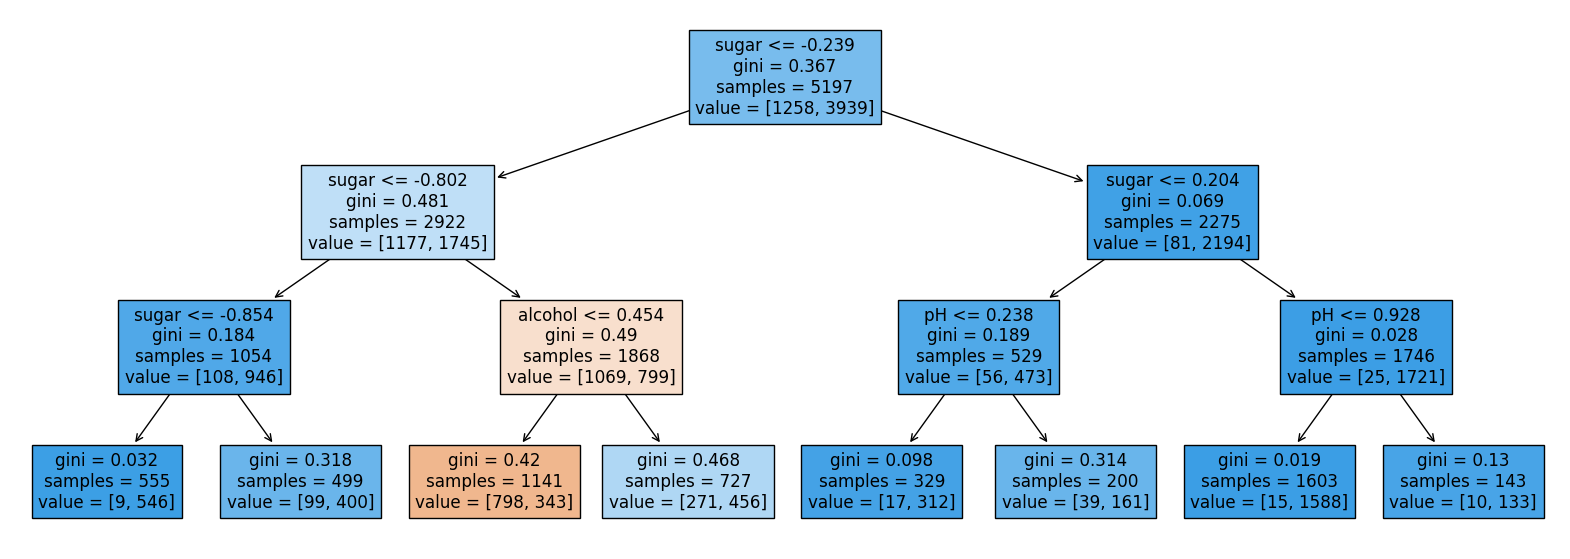

In [15]:
plt.figure(figsize=(20,7))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

# 색이 다른 리프 노드 -> 0을 분류
# 나머지는 1 분류
# 트리 노드의 주의점 : 전처리 할 때 정규화하면 안됨

In [16]:
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_input,train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.8454877814123533
0.8415384615384616


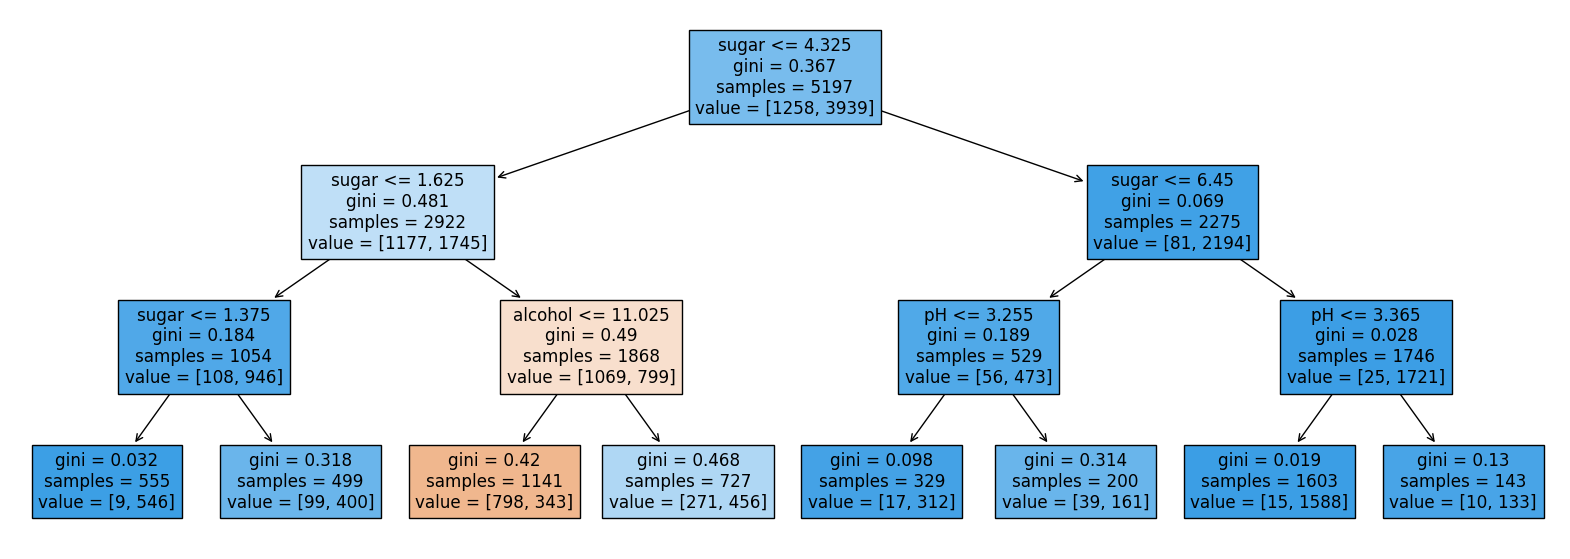

In [17]:
plt.figure(figsize=(20,7))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

# 중요

In [18]:
# 트리 모델 영향변수
# feature_importance는 고르게 분포되면 좋음
print(dt.feature_importances_)


[0.12345626 0.86862934 0.0079144 ]


In [19]:
## 정보이득에 따른 가지치기
dt=DecisionTreeClassifier(min_impurity_decrease=0.0005,random_state=42)
dt.fit(train_input,train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.8874350586877044
0.8615384615384616


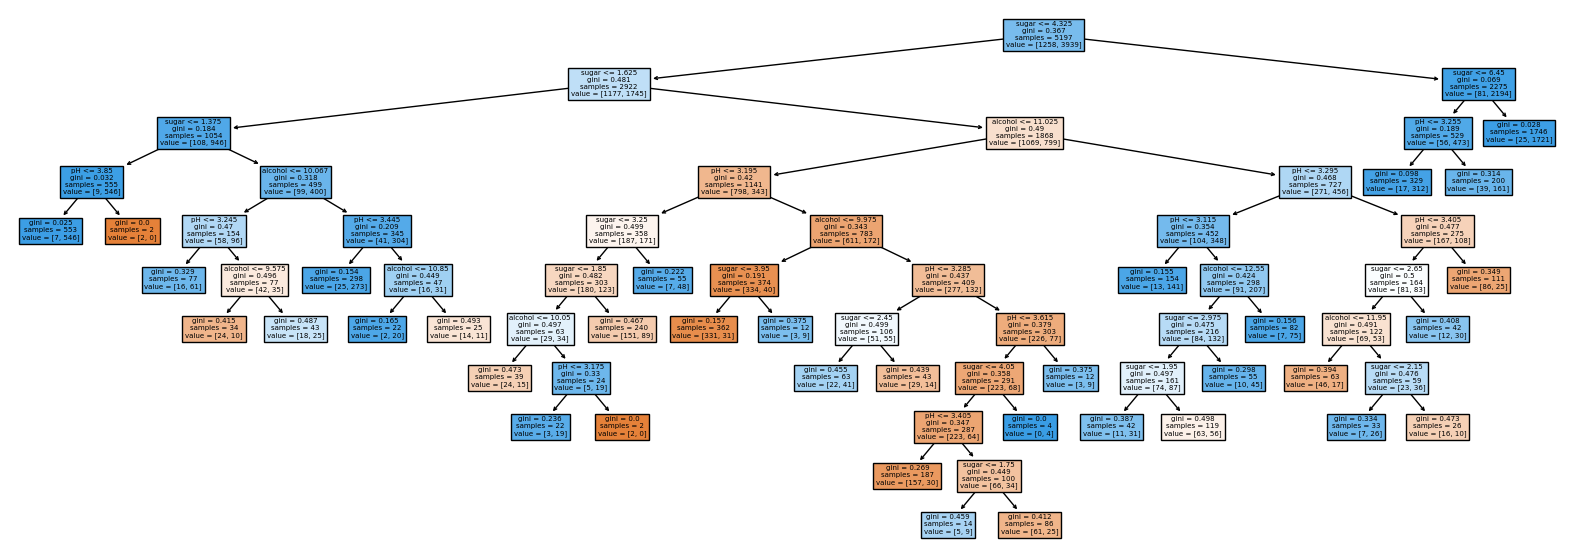

In [20]:
plt.figure(figsize=(20,7))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

In [21]:
# min_impurity_decrease -> 10 배수씩 

dt=DecisionTreeClassifier(min_impurity_decrease=0.005,random_state=42)
dt.fit(train_input,train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.8568404848951318
0.8476923076923077


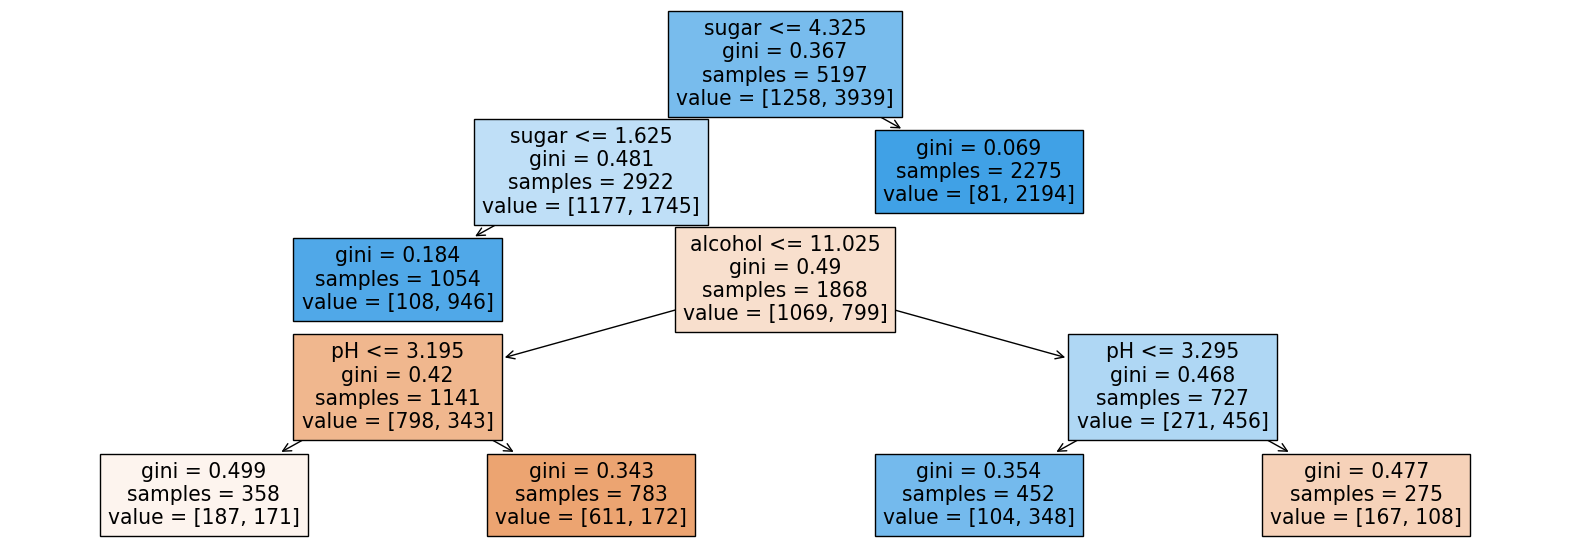

In [22]:
plt.figure(figsize=(20,7))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

In [23]:
min_impurity_decrease_list = [0.005 * (10**i) for i in range(20)]

In [24]:
train_score = []
test_score = []

In [25]:
for min_impurity_decrease in min_impurity_decrease_list:
    # 결정 트리 모델 객체 생성
    dt = DecisionTreeClassifier(min_impurity_decrease=min_impurity_decrease, random_state=42)
    
    # 결정 트리 모델 훈련
    dt.fit(train_input, train_target)
    
    # 훈련 점수와 테스트 점수를 리스트에 추가
    train_score.append(dt.score(train_input, train_target))
    test_score.append(dt.score(test_input, test_target))

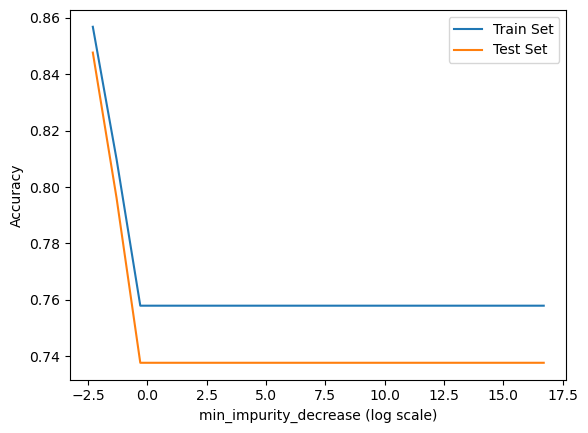

In [26]:
import numpy as np

plt.plot(np.log10(min_impurity_decrease_list), train_score, label="Train Set")
plt.plot(np.log10(min_impurity_decrease_list), test_score, label="Test Set")
plt.xlabel('min_impurity_decrease (log scale)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

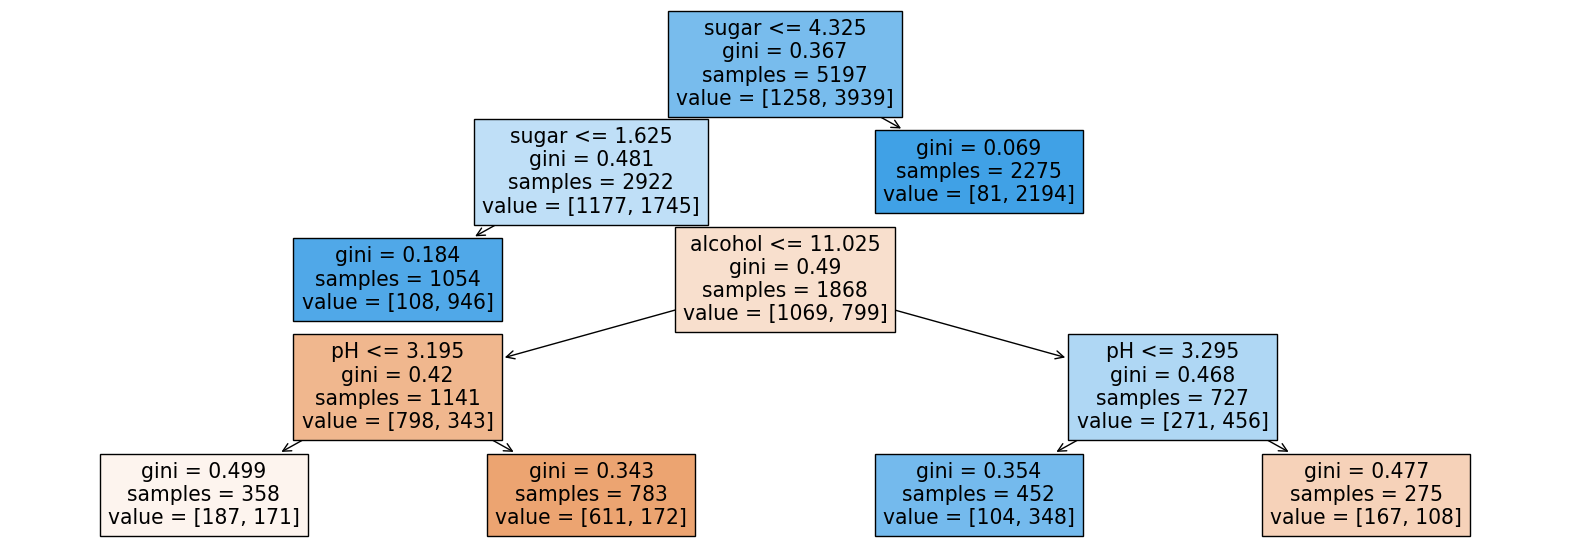

In [27]:
# 선택된 min_impurity_decrease로 결정 트리 시각화 (예: 가장 성능이 좋은 모델)
best_index = np.argmax(test_score)
best_min_impurity_decrease = min_impurity_decrease_list[best_index]

best_dt = DecisionTreeClassifier(min_impurity_decrease=best_min_impurity_decrease, random_state=42)
best_dt.fit(train_input, train_target)

plt.figure(figsize=(20, 7))
plot_tree(best_dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [28]:
## 강사님 코드
impurity_list=[0.000005,0.00005,0.0005,0.005,0.05]

train_score=[]
test_score=[]

In [29]:
for i in impurity_list:
    dt=DecisionTreeClassifier(min_impurity_decrease=i,random_state=42)
    dt.fit(train_input,train_target)
    
    train_point=dt.score(train_input,train_target)
    test_point=dt.score(test_input,test_target)
    
    train_score.append(train_point)
    test_score.append(test_point)

In [30]:
train_score

[0.9965364633442371,
 0.9853761785645565,
 0.8874350586877044,
 0.8568404848951318,
 0.8098903213392342]

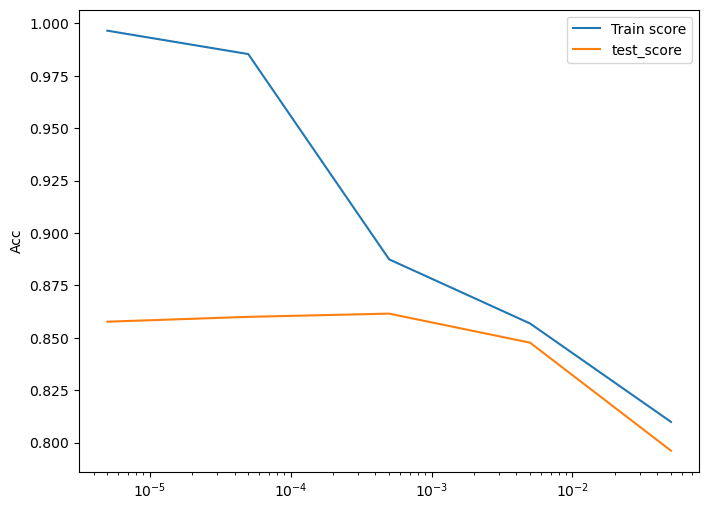

In [31]:
from cProfile import label


plt.figure(figsize=(8,6))
plt.plot(impurity_list,train_score,label="Train score")
plt.plot(impurity_list,test_score,label="test_score")
plt.xscale('log')
plt.ylabel("Acc")
plt.legend()
plt.show()

In [32]:
# 로또 
import random  as sf
numbers=range(1,46)
lotto=sf.sample(numbers,6)
lotto.sort()
print(lotto)




[2, 6, 7, 8, 19, 24]
